### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA

### Lendo os dados de treino: ----

In [2]:
def load(f):
    return np.load(f)['arr_0']

x_train = load('k49-train-imgs.npz')
y_train = load('k49-train-labels.npz')

# Flatten images
x_train = x_train.reshape(-1, 784)

scaler = preprocessing.StandardScaler().fit(x_train)


### Quantas observações por classe:

In [3]:
observacoes_por_classe = pd.Series(y_train).astype(int).value_counts()

In [4]:
observacoes_por_classe.sort_values(ascending=True)  ##classe com o menor número de observações

45     392
44     417
3      777
36    1598
32    1718
29    1993
22    2063
42    2139
43    2397
23    2451
16    2565
31    3060
33    3394
48    3523
14    3867
13    4165
8     4714
26    5132
37    6000
35    6000
34    6000
38    6000
39    6000
40    6000
24    6000
46    6000
27    6000
47    6000
21    6000
20    6000
19    6000
18    6000
17    6000
15    6000
12    6000
11    6000
10    6000
9     6000
7     6000
6     6000
5     6000
4     6000
2     6000
1     6000
25    6000
0     6000
28    6000
30    6000
41    6000
dtype: int64

<AxesSubplot:>

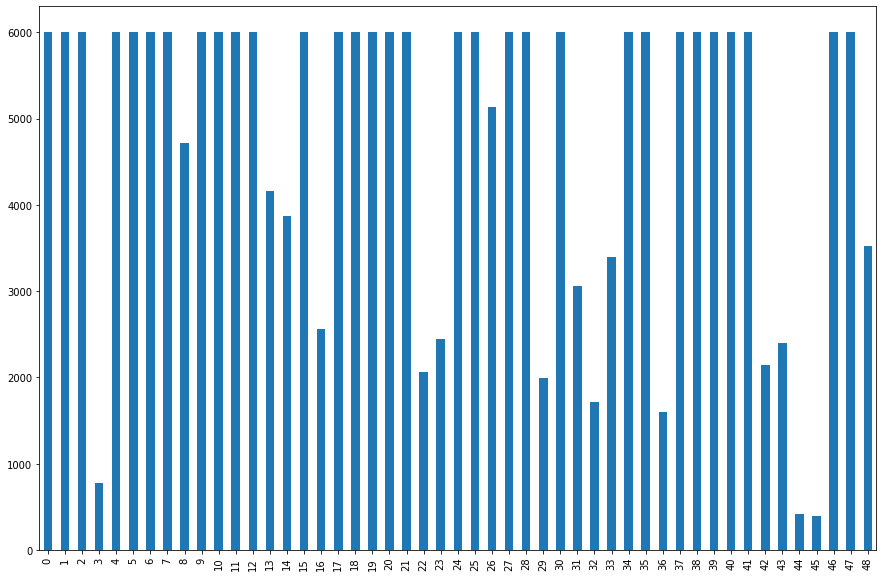

In [5]:
observacoes_por_classe.sort_index().plot.bar(figsize=(15, 10))

### APLICANDO PCA:

In [6]:
x_train.shape

(232365, 784)

In [7]:
# 2. Decomponha a matriz de variâncias e covariâncias em componentes principais.
X = np.matrix(x_train)
S = np.cov(np.transpose(X))

In [8]:
# variâncias
np.diagonal(S)



array([   48.104471  ,   129.651426  ,   255.43622163,   421.40729048,
         648.02541387,   974.48762162,  1434.02917537,  2047.66749645,
        2782.47655772,  3605.09078221,  4433.93850627,  5189.89865135,
        5795.75912591,  6185.63084404,  6162.71709516,  5777.95643649,
        5043.43768198,  4159.52063717,  3207.25292513,  2401.72053142,
        1780.72203226,  1279.03091588,   888.57094543,   581.92476713,
         362.36906147,   204.2486565 ,    99.61878411,    33.93146257,
          94.75075551,   238.36379728,   437.64168821,   729.46863099,
        1175.71399348,  1827.10905095,  2731.61162766,  3782.55267866,
        4947.78634147,  6150.38946987,  7250.56660151,  8242.8657503 ,
        9001.09974042,  9436.25781655,  9352.57906703,  8696.07797098,
        7554.81762617,  6232.57430199,  4933.26378803,  3890.69663639,
        3072.48521494,  2372.37715758,  1739.68113203,  1192.22888307,
         752.06603887,   410.21044974,   197.23069403,    77.24052786,
      

In [9]:

# Z-score the features (usando correlação)
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

pca = PCA(n_components=784)

pca.fit(X)

PCA(n_components=784)

In [13]:
np.round(pca.explained_variance_ratio_,4)

array([0.0869, 0.0513, 0.0336, 0.0307, 0.0269, 0.024 , 0.023 , 0.0199,
       0.0184, 0.0166, 0.0162, 0.0154, 0.0143, 0.014 , 0.0126, 0.0125,
       0.0123, 0.0116, 0.0111, 0.0107, 0.0107, 0.0103, 0.0097, 0.0095,
       0.0092, 0.0087, 0.0086, 0.0082, 0.008 , 0.0079, 0.0077, 0.0073,
       0.0072, 0.007 , 0.0069, 0.0066, 0.0065, 0.0064, 0.0062, 0.0061,
       0.006 , 0.0058, 0.0055, 0.0054, 0.0052, 0.0051, 0.005 , 0.0049,
       0.0048, 0.0047, 0.0046, 0.0045, 0.0045, 0.0044, 0.0042, 0.0042,
       0.0041, 0.004 , 0.0039, 0.0039, 0.0038, 0.0038, 0.0036, 0.0035,
       0.0035, 0.0034, 0.0034, 0.0032, 0.0031, 0.0031, 0.003 , 0.003 ,
       0.0029, 0.0029, 0.0029, 0.0028, 0.0028, 0.0027, 0.0026, 0.0026,
       0.0026, 0.0025, 0.0025, 0.0024, 0.0024, 0.0024, 0.0024, 0.0023,
       0.0023, 0.0022, 0.0022, 0.0021, 0.0021, 0.0021, 0.002 , 0.002 ,
       0.002 , 0.0019, 0.0019, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018,
       0.0018, 0.0017, 0.0017, 0.0017, 0.0016, 0.0016, 0.0016, 0.0016,
      

In [16]:
variancia_explicada = pca.explained_variance_ratio_.cumsum()
len(variancia_explicada[variancia_explicada<=0.90])

163

para ter 90 da variância explicada, só precisa da 163 primeiras componentes

In [ ]:

novo_treino = pd.DataFrame()
for componente in range(0, 163):
    coluna = pca.transform(X)[:,componente]
    nome_coluna = 'PCA'+str(componente)
    novo_treino[nome_coluna] = coluna

### Regressão Logística Multinomial

In [10]:
logreg=LogisticRegression(penalty='none', max_iter=500)
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,x_train,y_train,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

KeyboardInterrupt: 

In [ ]:
## Variaveis normalizadas: ------
X_scaled = scaler.transform(x_train)

logreg=LogisticRegression(penalty='none', max_iter=500)
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,X_scaled,y_train,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

### Árvore de classificação:

In [ ]:
arvore= tree.DecisionTreeClassifier()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(arvore,x_train,y_train,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

### Naive Bayes:

In [ ]:
nb= MultinomialNB()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(nb,x_train,y_train,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

## Lazy Predict

In [ ]:
import lazypredict

In [ ]:
pip install lazypredict